# 3rd Assigment: Pneumonia Chest X-ray 

Data: https://www.kaggle.com/parthachakraborty/pneumonia-chest-x-ray/downloads/All.zip

This zip file contains 5856 Chest X-Ray images as jpeg format and a CSV file(GTruth.csv). The CSV file contains ground truth information for images."0" means Pneumonia case and "1" means normal case.

The assigment has two parts:

+ Developing a CNN model to classify X-ray images with high accuracy.
+ To explore classifier explanation methods.

In [ ]:
import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras import backend as k 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import tensorflow.keras
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split



In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
df=pd.read_csv('My Drive/MDS/Deep Learning/All/GTruth.csv')
df.head()

,Id,Ground_Truth
0,643781546,1
1,540270208,0
2,585452583,1
3,341665171,0
4,940983956,1


Download the data in a directory called `All`.

In [4]:
kv_dict= dict(zip(df['Id'].values,df['Ground_Truth'].values))
kv_dict

{643781546: 1,
 540270208: 0,
 585452583: 1,
 341665171: 0,
 940983956: 1,
 351876904: 0,
 833529062: 0,
 65354019: 1,
 864873088: 1,
 261031442: 0,
 391277389: 0,
 749354161: 1,
 269118795: 0,
 38909281: 1,
 255411092: 1,
 693759901: 0,
 221912234: 1,
 200725658: 1,
 794538028: 1,
 605689867: 0,
 422941988: 1,
 485016781: 0,
 336196931: 1,
 154471781: 1,
 83351054: 0,
 355920256: 0,
 427807999: 1,
 774938683: 1,
 345755509: 0,
 204292657: 1,
 313025667: 0,
 234259238: 1,
 21335482: 0,
 599260779: 1,
 785725781: 1,
 29100641: 1,
 62322510: 0,
 126945057: 0,
 12300583: 1,
 603627132: 0,
 371015170: 0,
 125920418: 1,
 821093472: 1,
 211188056: 1,
 123464343: 0,
 697457186: 0,
 131206546: 1,
 283488682: 0,
 300543131: 1,
 323623474: 0,
 926674154: 1,
 95371153: 0,
 878645698: 1,
 492690172: 0,
 729554598: 1,
 17947132: 1,
 136754357: 0,
 940444465: 1,
 547551082: 0,
 945052599: 1,
 211431234: 1,
 904098070: 1,
 647732844: 1,
 686659192: 1,
 622207917: 0,
 586776405: 1,
 562213608: 1,
 609

In [7]:
#Reading Image data and converting it into pixels and separating class labels

from tqdm import tqdm

Data=[]
Label=[]
directory='My Drive/All'

for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".jpeg") or filename.endswith(".jpg"):
        
        Label.append(kv_dict.get(int(filename.split('.')[0])))
        filename=os.path.join(directory, filename)
        im=image.load_img(filename,target_size=(224, 224))
        im=np.reshape(im,(224,224,3))
        im=im.astype('float32') / 255
        Data.append(im)
    else:
        continue    
        
 

100%|██████████| 5857/5857 [29:46<00:00,  3.44it/s]


In [ ]:

labels = np.array([[1, 0] if l==0 else [0,1] for l in Label])
  

In [ ]:
#Train Test Split
X_train, X_1, y_train, y_1 = train_test_split(np.array(Data), np.array(labels), test_size=0.2, random_state=42,stratify=Label)

#Train Test Split
X_cv, X_test, y_cv, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42,stratify=y_1)

In [10]:
img_width=224
img_height=224

from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
    X_train=X_train.reshape(X_train.shape[0],3,img_width,img_height)
    X_cv=X_cv.reshape(X_cv.shape[0],3,img_width,img_height)
    X_test=X_test.reshape(X_test.shape[0],3,img_width,img_height)
    
else:
    input_shape = (img_width, img_height, 3)
    X_train=X_train.reshape(X_train.shape[0],img_width,img_height,3)
    X_cv=X_cv.reshape(X_cv.shape[0],img_width,img_height,3)
    X_test=X_test.reshape(X_test.shape[0],img_width,img_height,3)
    
del Data

Using TensorFlow backend.


## Exercise 1

+ Design and train a convolutional neural network for classifying X-ray images. 
+ Report the final (train and test) accuracy of your model.
+ Plot the confusion matrix.

In [11]:
#Checking out what qe are working with

print(X_test[0].shape)
print(X_test[0][200][150])
print(X_test[0][19][0])
print(y_test[0])

(224, 224, 3)
[0.75686276 0.75686276 0.75686276]
[0.22352941 0.22352941 0.22352941]
[0 1]


In [ ]:
#Checking distribution rgb on a picture (more or less they are similar --> visual inspection)
reds = []
greens = []
blues = []
for row in X_test[0]:
  for pixel in row:
    red, green, blue = pixel
    reds.append(red)
    greens.append(green)
    blues.append(blue)



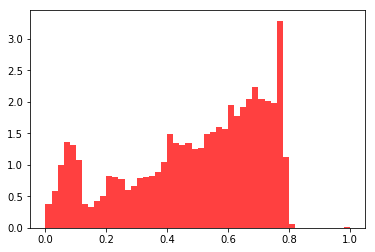

In [13]:
%matplotlib inline

#Red color
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(reds, 50, density=True, facecolor='r', alpha=0.75)


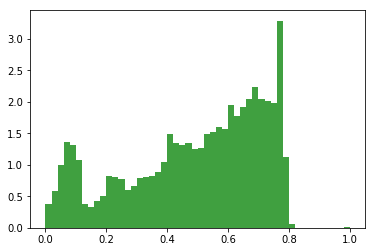

In [14]:
n, bins, patches = plt.hist(greens, 50, density=True, facecolor='g', alpha=0.75)

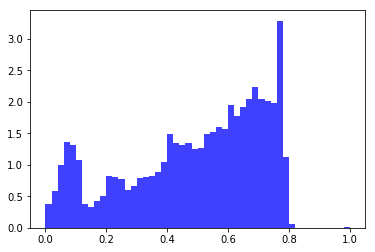

In [15]:
n, bins, patches = plt.hist(blues, 50, density=True, facecolor='b', alpha=0.75)

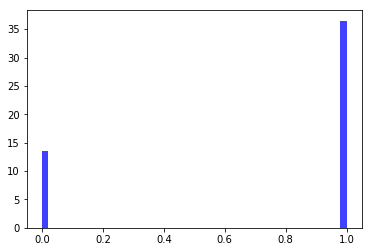

In [16]:
# how many one an zeros
labels = [value for key, value in kv_dict.items()]
n, bins, patches = plt.hist(labels, 50, density=True, facecolor='b', alpha=0.75)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [18]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(112, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(Dropout(0.2))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(112, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 2, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = "sgd", loss = 'binary_crossentropy', metrics = ['accuracy'])

batch_size = 10
epochs = 20


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
# Part 2 - Fitting the CNN to the images
classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_cv, y_cv))

Train on 4684 samples, validate on 937 samples
Epoch 1/20
4684/4684 [==============================] - 43s 9ms/step - loss: 0.3161 - acc: 0.8626 - val_loss: 0.3052 - val_acc: 0.8714
Epoch 2/20
4684/4684 [==============================] - 43s 9ms/step - loss: 0.2532 - acc: 0.8963 - val_loss: 0.2022 - val_acc: 0.9429
Epoch 3/20
4684/4684 [==============================] - 43s 9ms/step - loss: 0.2223 - acc: 0.9152 - val_loss: 0.1927 - val_acc: 0.9344
Epoch 4/20
4684/4684 [==============================] - 43s 9ms/step - loss: 0.1983 - acc: 0.9194 - val_loss: 0.1629 - val_acc: 0.9477
Epoch 5/20
4684/4684 [==============================] - 43s 9ms/step - loss: 0.1850 - acc: 0.9322 - val_loss: 0.1459 - val_acc: 0.9482
Epoch 6/20
4684/4684 [==============================] - 43s 9ms/step - loss: 0.1706 - acc: 0.9380 - val_loss: 0.2272 - val_acc: 0.9130
Epoch 7/20
4684/4684 [==============================] - 43s 9ms/step - loss: 0.1596 - acc: 0.9411 - val_loss: 0.1671 - val_acc: 0.9424
Epoch 8/

In [21]:
prediction = classifier.evaluate(X_test, y_test)
prediction

235/235 [==============================] - 1s 6ms/step


[0.04925578637643063, 0.9829787234042553]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
prediction = classifier.predict(X_test)
y_pred = [0 if round(pred[0]) == 1 else 1 for pred in prediction ]
y_test2 = [0 if round(pred[0]) == 1 else 1 for pred in y_test ]
print(confusion_matrix(y_test2, y_pred))

[[ 62   2]
 [  2 169]]


## Exercise 2

SHAP (SHapley Additive exPlanations) (https://github.com/slundberg/shap) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.

Some of the methods implemented in SHAP are designed to explain image classifications. Apply these methods to your model and make a critical review of their results.

In [26]:
!pip install shap

     |████████████████████████████████| 235kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/93/3f/4a/331cf71b5043416aeba0df795e7c204c7ad277673f1938d11b
Successfully built shap


In [27]:
import shap

shap.initjs()

#e = shap.DeepExplainer(classifier, X_test)
background = X_train[np.random.choice(X_train.shape[0], 30, replace=False)]
e = shap.DeepExplainer(classifier, background)

label Pneumonia
predict [[0.92726946 0.06678311]]


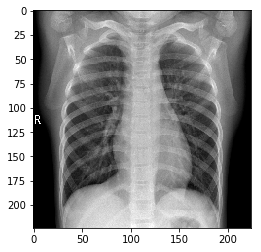

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


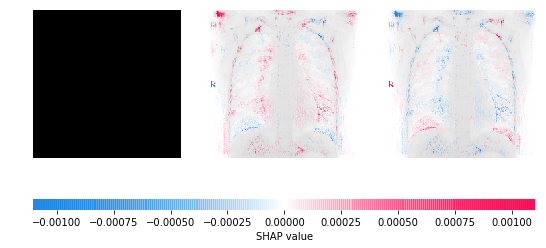

In [29]:
# Pneumonia no
idx=2


if y_test[idx][1] == 0 and y_test[idx][0] == 1:
  print("label", "Pneumonia")
else:
  print("label", "Non Pneumonia") 
  
print("predict", classifier.predict(X_test[idx:idx+1]))
element= X_test[idx]
from PIL import Image
plt.imshow(element)
plt.show()
shap_values = e.shap_values(X_test[idx:idx+1])
shap.image_plot(shap_values, -X_test[idx:idx+1])

From the youtube video we can appreciate that the lateral regions of the ribbs  and the center of the image (possible affection of the lungs) are the most predominant features for the doctors to differenciate the diagnose. As we appreciate in the shap values our model use the same areas to discriminate between classes. Also, we see that the top part of the image belonging to the shoulders is highly use for the model to classify the images altough we didn't see any relation with the doctor diagnose on the literature.

Doctor diganose video: https://www.youtube.com/watch?v=HBS-DJ9ez-c
  